In [33]:
import os
import time
import psutil
import ctypes
import numpy as np
import matplotlib.pyplot as plt

In [34]:
# Pin process to CPU 1
p = psutil.Process()
p.cpu_affinity([1])


In [ ]:
# Part A3.0: New kernel_module code

In [35]:
# Part A3.1: Access PMU from python
# Load shared library
lib = ctypes.CDLL('./cwrapper.so')

In [36]:
# Part A3.2: Comparing and Gathering Data
lib.init_counters.argtypes = []
lib.init_counters.restype = None

lib.get_cyclecount.argtypes = []
lib.get_cyclecount.restype = ctypes.c_uint32

In [37]:
# Recursive Fibonacci
def recur_fibo(n):
    if n <= 1:
        return n
    return recur_fibo(n - 1) + recur_fibo(n - 2)


In [38]:
# CPU frequency (Hz) = 650 Mhz approx 325 * 2 BogoMIPS
CPU_FREQ = 3.25e8   # For CPU 1

# Experiment parameters
n_values = range(1, 31)
trials = 3
avg_time_py = []
avg_time_pmu = []
err_py = []
err_pmu = []

In [39]:
for n in n_values:

    py_trials = []
    pmu_trials = []

    for _ in range(trials):

        # Initialize PMU
        lib.init_counters()

        # Python time before
        t_before = time.perf_counter()

        # Cycle count before
        c_before = lib.get_cyclecount()

        # Run Fibonacci
        recur_fibo(n)

        # Cycle count after
        c_after = lib.get_cyclecount()

        # Python time after
        t_after = time.perf_counter()

        # Compute deltas
        delta_cycles = c_after - c_before
        delta_time_py = t_after - t_before
        delta_time_pmu = delta_cycles / CPU_FREQ

        py_trials.append(delta_time_py)
        pmu_trials.append(delta_time_pmu)

    # Compute averages
    avg_time_py.append(np.mean(py_trials))
    avg_time_pmu.append(np.mean(pmu_trials))

    # Standard error
    err_py.append(np.std(py_trials) / np.sqrt(trials))
    err_pmu.append(np.std(pmu_trials) / np.sqrt(trials))


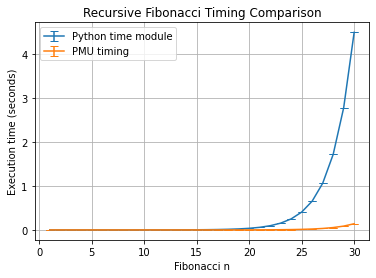

In [40]:
# Plot results and save figure
plt.figure()

plt.errorbar(
    n_values,
    avg_time_py,
    yerr=err_py,
    label="Python time module",
    capsize=4
)

plt.errorbar(
    n_values,
    avg_time_pmu,
    yerr=err_pmu,
    label="PMU timing",
    capsize=4
)

plt.xlabel("Fibonacci n")
plt.ylabel("Execution time (seconds)")
plt.title("Recursive Fibonacci Timing Comparison")
plt.legend()
plt.grid(True)

plt.savefig("cycle_plot.png")
plt.show()


